In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score,precision_score,precision_recall_curve,roc_curve,roc_auc_score,recall_score,matthews_corrcoef
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"D:\Bos\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset shape:", df.shape)
print(df.head())


# Clean TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Target
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# REMOVE: df = pd.get_dummies(...)  <-- DELETE THIS LINE FROM HERE
X = df.drop('Churn', axis=1)
y = df['Churn']




Dataset shape: (7043, 19)
   gender Partner Dependents  tenure PhoneService     MultipleLines  \
0  Female     Yes         No       1           No  No phone service   
1    Male      No         No      34          Yes                No   
2    Male      No         No       2          Yes                No   
3    Male      No         No      45           No  No phone service   
4  Female      No         No       2          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          N

--- Training Set Size Evolution ---
1. Original Training Size: 3445 samples
   - Real Churners: 915
   - Real Non-Churners: 2530
Starting SMOTified GAN Process...

2. Size after SMOTE (Augmentation): 4301 samples
   - SMOTE-Augmented Churners: 1771
   - SMOTE-Augmented Non-Churners: 2530


Gen. (-2.65) | Discrim. (2.16): 100%|██████████| 500/500 [09:36<00:00,  1.15s/it] 


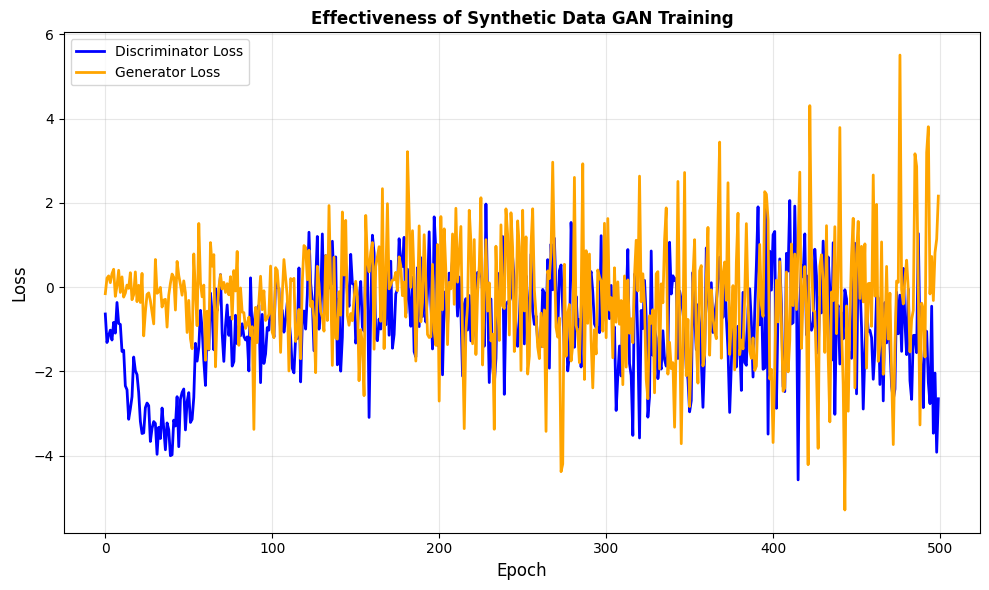


3. Final SMOTified GAN Training Size: 5060 samples
   - Total Balanced Churners: 2530
   - Total Non-Churners: 2530
----------------------------------

--- Model Performance Results ---

--- Random Forest (Best Threshold: 0.1900) ---
              precision    recall  f1-score   support

           0       0.93      0.61      0.74      1549
           1       0.45      0.88      0.59       561

    accuracy                           0.68      2110
   macro avg       0.69      0.74      0.67      2110
weighted avg       0.80      0.68      0.70      2110



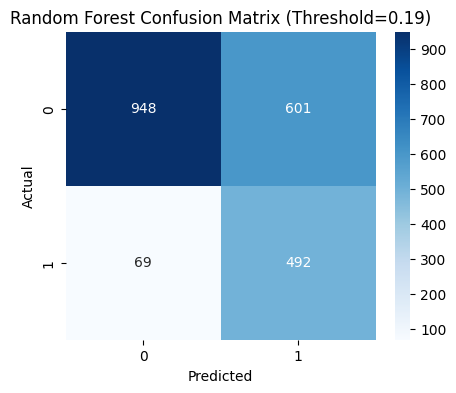

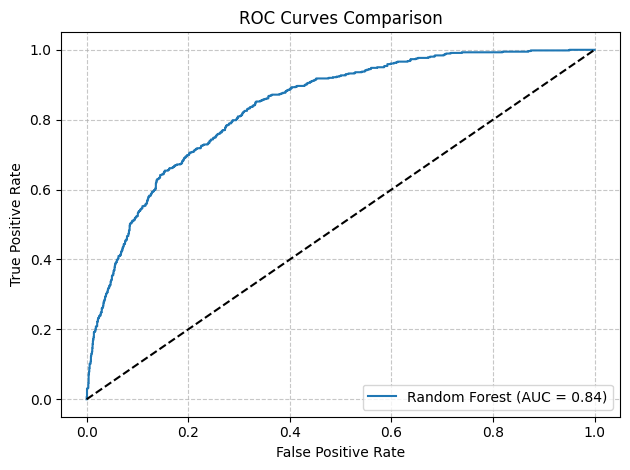


--- Logistic Regression (Best Threshold: 0.1900) ---
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1549
           1       0.46      0.87      0.60       561

    accuracy                           0.69      2110
   macro avg       0.69      0.75      0.67      2110
weighted avg       0.81      0.69      0.71      2110



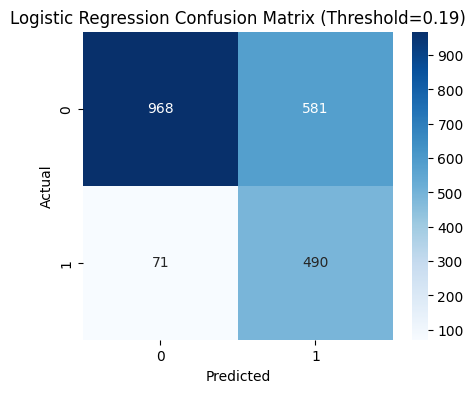

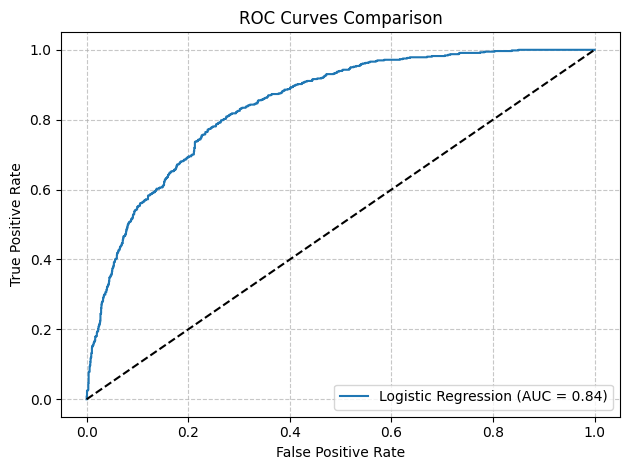


--- Decision Tree (Best Threshold: 0.1900) ---
              precision    recall  f1-score   support

           0       0.87      0.66      0.75      1549
           1       0.43      0.72      0.54       561

    accuracy                           0.67      2110
   macro avg       0.65      0.69      0.65      2110
weighted avg       0.75      0.67      0.69      2110



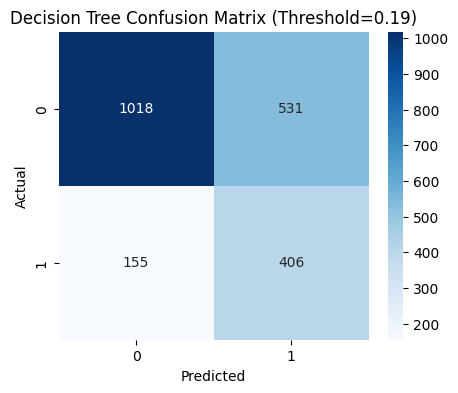

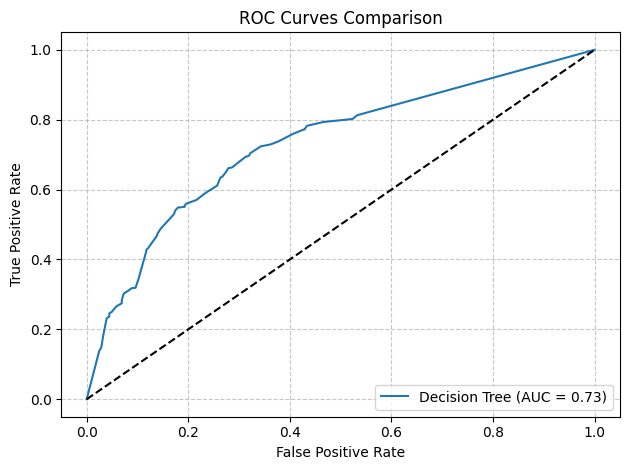


--- XGBoost (Best Threshold: 0.1900) ---
              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1549
           1       0.48      0.84      0.61       561

    accuracy                           0.71      2110
   macro avg       0.70      0.75      0.69      2110
weighted avg       0.80      0.71      0.73      2110



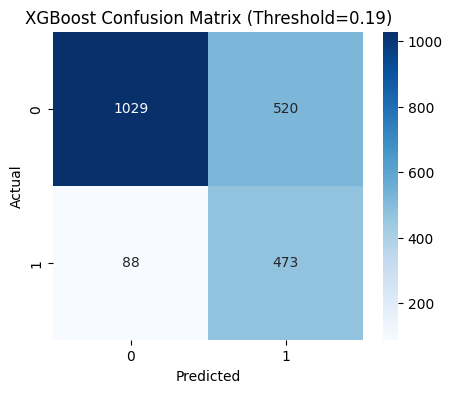

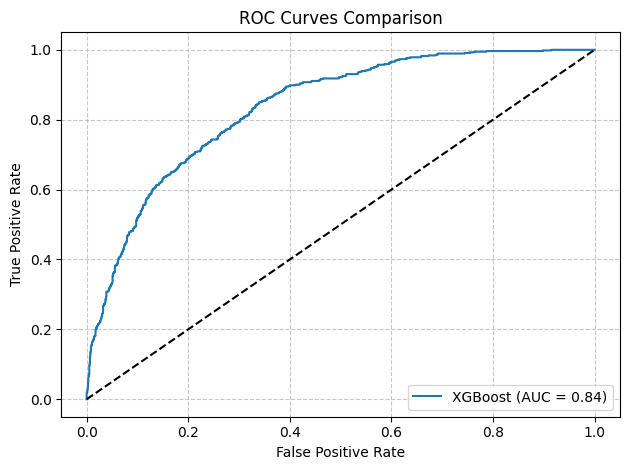


--- LightGBM (Best Threshold: 0.1900) ---
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1549
           1       0.47      0.81      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.79      0.71      0.72      2110



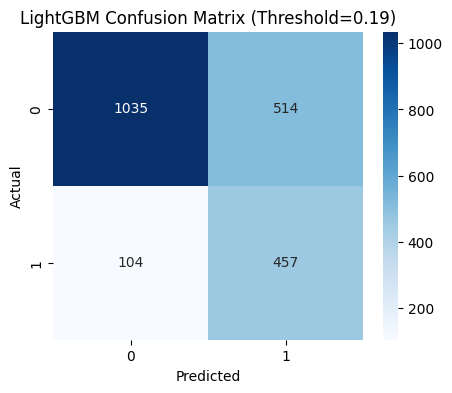

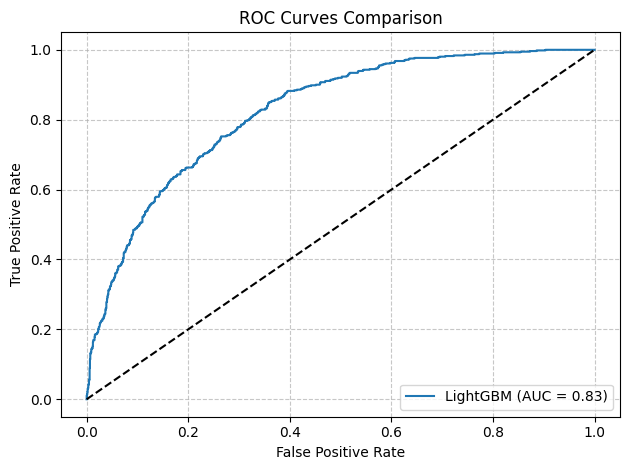


--- CatBoost (Best Threshold: 0.1900) ---
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1549
           1       0.47      0.84      0.60       561

    accuracy                           0.70      2110
   macro avg       0.69      0.75      0.68      2110
weighted avg       0.80      0.70      0.72      2110



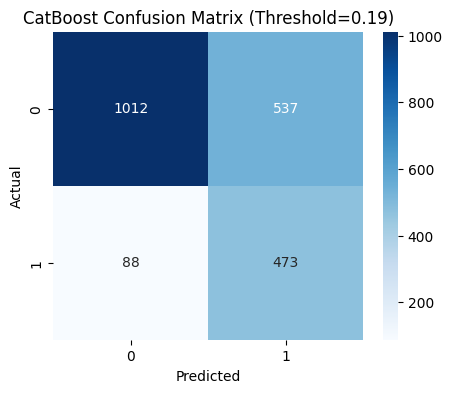

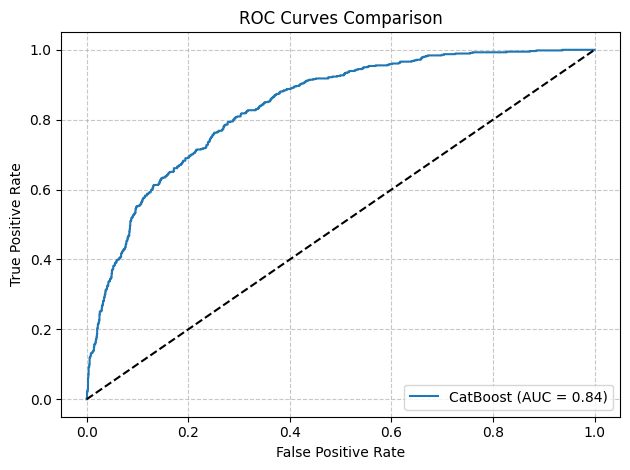


--- Summary of All Model Results ---
                 Model  Best Threshold  Accuracy  F1 Score       AUC  \
0        Random Forest            0.19  0.682464  0.594921  0.837733   
1  Logistic Regression            0.19  0.690995  0.600490  0.843926   
2        Decision Tree            0.19  0.674882  0.542056  0.731552   
3              XGBoost            0.19  0.711848  0.608752  0.836009   
4             LightGBM            0.19  0.707109  0.596606  0.825294   
5             CatBoost            0.19  0.703791  0.602164  0.837985   

   Precision(churn=0)  Precision(churn=1)  F1-score(churn=1)  Recall(churn=1)  \
0            0.932153            0.450137           0.594921         0.877005   
1            0.931665            0.457516           0.600490         0.873440   
2            0.867860            0.433298           0.542056         0.723708   
3            0.921218            0.476334           0.608752         0.843137   
4            0.908692            0.470649           

In [9]:
import warnings
warnings.filterwarnings('ignore')
# Preprocessing & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
# GAN
from ctgan import CTGAN
# 1. DATA PREPARATION (Functional Approach)
# Assuming 'df' is your telecom dataframe and 'Churn' is the target (0 or 1)
X = df.drop('Churn', axis=1)
y = df['Churn']


def tune_threshold(model, X_val, y_val, thresholds=np.arange(0.1, 0.2, 0.01)):
    y_val_probs = model.predict_proba(X_val)[:,1]
    best_threshold, best_score = 0.5, 0
    for t in thresholds:
        y_val_pred = (y_val_probs >= t).astype(int)
        score = fbeta_score(y_val, y_val_pred, beta=0.2)  # F1 Score
        if score > best_score:
            best_score, best_threshold = score, t
    return best_threshold

# 2. TRAIN-TEST SPLIT (Split before any scaling or generation!)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp)

print("--- Training Set Size Evolution ---")

# Step 0: Original Size
print(f"1. Original Training Size: {len(X_train)} samples")
print(f"   - Real Churners: {sum(y_train == 1)}")
print(f"   - Real Non-Churners: {sum(y_train == 0)}")

# Identify categorical columns (This will now work because we didn't use get_dummies yet!)
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. SMOTified GAN (Hybrid Generation)
print("Starting SMOTified GAN Process...")

# To keep this clean, we encode temporarily only for SMOTE, but use RAW for GAN
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_smote_enc, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

print(f"\n2. Size after SMOTE (Augmentation): {len(X_train_smote_enc)} samples")
print(f"   - SMOTE-Augmented Churners: {sum(y_train_smote == 1)}")
print(f"   - SMOTE-Augmented Non-Churners: {sum(y_train_smote == 0)}")
# B. CTGAN (The Realism Step)

# B. Step 2: CTGAN Refinement (The "SMOTified" Step)
# We train the GAN on the SMOTE-generated churners so it learns to "smooth" them
smote_churners = X_train_smote_enc[y_train_smote == 1].copy()
d_loss_history = []
g_loss_history = []

gan_model = CTGAN(
    epochs=500, 
    batch_size=64, 
    pac=8, 
    verbose=True
) 
gan_model.fit(smote_churners)
if hasattr(gan_model, 'loss_values'):
    d_loss_history = gan_model.loss_values.iloc[:, 1].tolist() # Discriminator is usually col 1
    g_loss_history = gan_model.loss_values.iloc[:, 2].tolist() # Generator is usually col 2
else:
    # Fallback if the attribute is named differently in your specific version
    d_loss_history = [0] * 300 
    g_loss_history = [0] * 300

# --- ADD YOUR PLOT CODE HERE ---
plt.figure(figsize=(10, 6))
plt.plot(d_loss_history, label='Discriminator Loss', linewidth=2, color='blue')
plt.plot(g_loss_history, label='Generator Loss', linewidth=2, color='orange')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effectiveness of Synthetic Data GAN Training', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# C. Step 3: Generate Refined Samples
target_count = len(y_train[y_train == 0])
needed_samples = target_count - len(y_train[y_train == 1])
synthetic_refined = gan_model.sample(needed_samples)

# Combine original ENCODED training data with GAN-Refined SMOTE churners
X_train_ready = pd.concat([X_train_encoded, synthetic_refined])
y_train_final = pd.concat([y_train, pd.Series([1]*len(synthetic_refined))])
print(f"\n3. Final SMOTified GAN Training Size: {len(X_train_ready)} samples")
print(f"   - Total Balanced Churners: {sum(y_train_final == 1)}")
print(f"   - Total Non-Churners: {sum(y_train_final == 0)}")
print("----------------------------------")

# Ensure Validation and Test sets match the encoded training columns
X_val_ready = pd.get_dummies(X_val, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
X_test_ready = pd.get_dummies(X_test, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
# 4. FEATURE SCALING
scaler = StandardScaler()

# Use the "_ready" variables which contain the 0/1 numeric columns
X_train_scaled = scaler.fit_transform(X_train_ready) 
X_val_scaled = scaler.transform(X_val_ready) 
X_test_scaled = scaler.transform(X_test_ready)


# 5. EXECUTE ALL 6 MODELS
models = {
    # 1. Random Forest: Reduced depth to prevents overfitting to synthetic noise
    # removed class_weight because data is already 50/50 balanced
    "Random Forest": RandomForestClassifier(
        n_estimators=500,           # 1000 is often overkill
        max_depth=15,               # 40 is way too deep; 15 keeps it generalizing
        min_samples_split=10,       # Higher number prevents isolating single synthetic rows
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        n_jobs=-1,
        criterion='gini'
    ),

    # 2. Logistic Regression: 
    # removed class_weight='balanced'
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight=None,          # VITAL: Data is already balanced!
        random_state=42
    ),

    # 3. Decision Tree:
    # Reduced depth significantly
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,               # 40 causes massive overfitting
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        criterion='gini'
    ),

    # 4. XGBoost:
    # scale_pos_weight=1 means "treat classes equally"
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,                # 12 is too deep for tabular data (usually 4-8 is best)
        learning_rate=0.02,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,                    # Higher gamma = more conservative (higher precision)
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_weight=3,
        scale_pos_weight=1,         # VITAL: Removed the 1.05 bias
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1,
        tree_method='hist'
    ),

    # 5. LightGBM:
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        max_depth=8,                # Restrained depth
        learning_rate=0.02,
        num_leaves=32,              # 70 was likely overfitting
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_samples=10,
        random_state=42,
        class_weight=None,          # VITAL: Removed bias
        verbose=-1,
        n_jobs=-1,
        boosting_type='gbdt'
    ),

    # 6. CatBoost:
    # auto_class_weights='None' because we fixed the data ourselves
    "CatBoost": CatBoostClassifier(
        iterations=800,
        depth=6,                    # 12 is extremely deep for CatBoost (slow & overfits)
        learning_rate=0.02,
        l2_leaf_reg=5,              # Higher regularization = higher precision
        random_strength=1,
        bagging_temperature=0.5,
        border_count=128,
        random_state=42,
        verbose=0,
        thread_count=-1,
        auto_class_weights='None'   # VITAL: Do not let model re-balance
    )
}

print("\n--- Model Performance Results ---")
model_results = {}
results=[]
best_thresholds = {}

for name, model in models.items():
    # A. Train on balanced data
    model.fit(X_train_scaled, y_train_final)
    
    # B. Tune Threshold on the imbalanced Validation set
    t = tune_threshold(model, X_val_scaled, y_val)
    best_thresholds[name] = t
    
    # C. Evaluate on Test Set using the NEW threshold
    test_probs = model.predict_proba(X_test_scaled)[:,1]
    test_preds = (test_probs >= t).astype(int)
    model_results[name] = accuracy_score(y_test, test_preds)
    
    print(f"\n--- {name} (Best Threshold: {t:.4f}) ---")
    print(classification_report(y_test, test_preds))

    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix (Threshold={t:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    acc = accuracy_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    a = roc_auc_score(y_test, test_probs)
    results.append({
        "Model": name, "Best Threshold": round(best_thresholds[name], 2),
        "Accuracy": acc, "F1 Score": f1, "AUC": a,
        "Precision(churn=0)": precision_score(y_test, test_preds, pos_label=0),
        "Precision(churn=1)": precision_score(y_test, test_preds, pos_label=1),
        "F1-score(churn=1)": f1_score(y_test, test_preds, pos_label=1),
        "Recall(churn=1)": recall_score(y_test, test_preds, pos_label=1),
        "MaThthews Corr": matthews_corrcoef(y_test, test_preds),
        "G-Mean": geometric_mean_score(y_test, test_preds),
    })
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {a:.2f})")
    # Finalize ROC Plot outside the loop to show all models together
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves Comparison")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
print("\n--- Summary of All Model Results ---")
print(results_df)


--- Training Set Size Evolution ---
1. Original Training Size: 3445 samples
   - Real Churners: 915
   - Real Non-Churners: 2530
Starting SMOTified GAN Process...

2. Size after SMOTE (Augmentation): 4301 samples
   - SMOTE-Augmented Churners: 1771
   - SMOTE-Augmented Non-Churners: 2530


Gen. (-1.31) | Discrim. (0.50): 100%|██████████| 500/500 [10:55<00:00,  1.31s/it] 


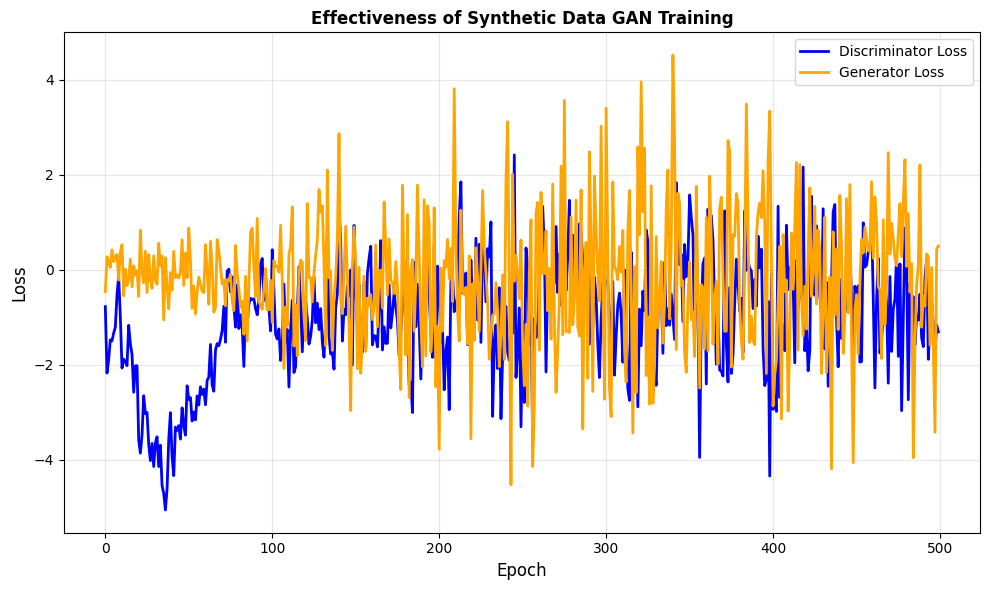


3. Final SMOTified GAN Training Size: 5060 samples
   - Total Balanced Churners: 2530
   - Total Non-Churners: 2530
----------------------------------

--- Model Performance Results ---

--- Random Forest (Best Threshold: 0.2900) ---
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1549
           1       0.52      0.75      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.75      0.76      2110



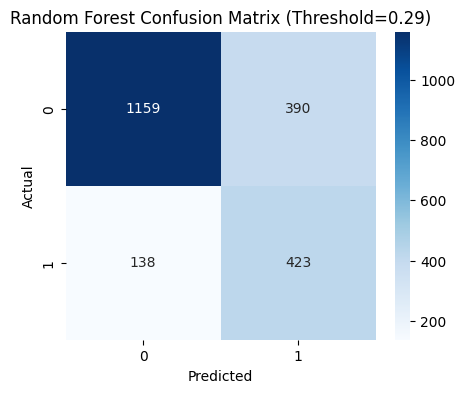

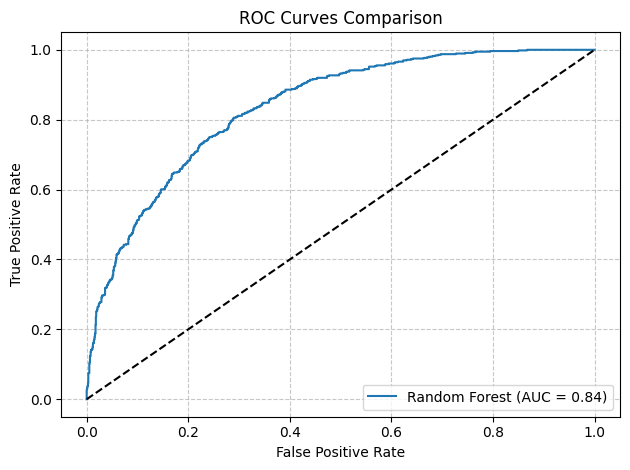


--- Logistic Regression (Best Threshold: 0.2900) ---
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1549
           1       0.51      0.77      0.62       561

    accuracy                           0.74      2110
   macro avg       0.71      0.75      0.71      2110
weighted avg       0.80      0.74      0.76      2110



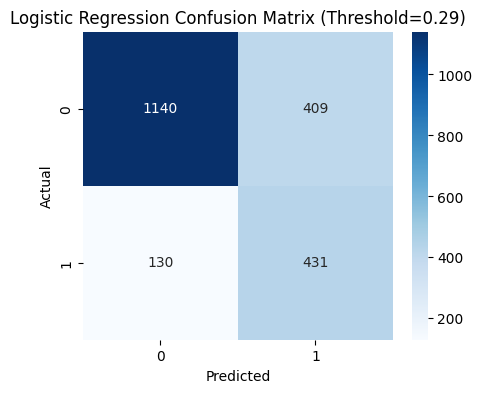

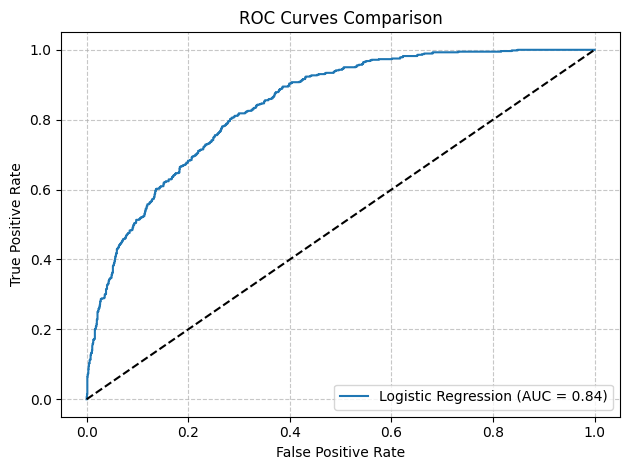


--- Decision Tree (Best Threshold: 0.2900) ---
              precision    recall  f1-score   support

           0       0.87      0.72      0.78      1549
           1       0.47      0.69      0.56       561

    accuracy                           0.71      2110
   macro avg       0.67      0.71      0.67      2110
weighted avg       0.76      0.71      0.73      2110



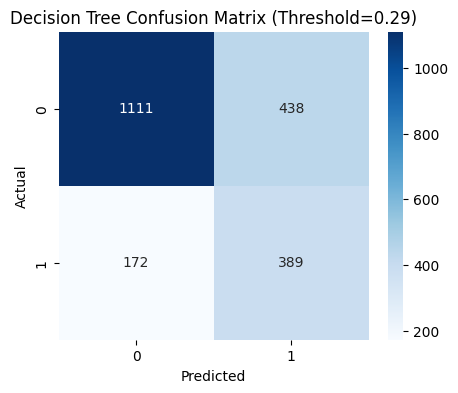

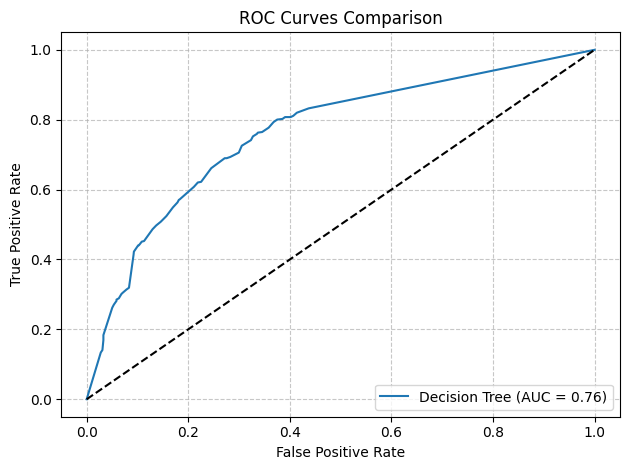


--- XGBoost (Best Threshold: 0.2900) ---
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1549
           1       0.53      0.74      0.61       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.75      0.76      2110



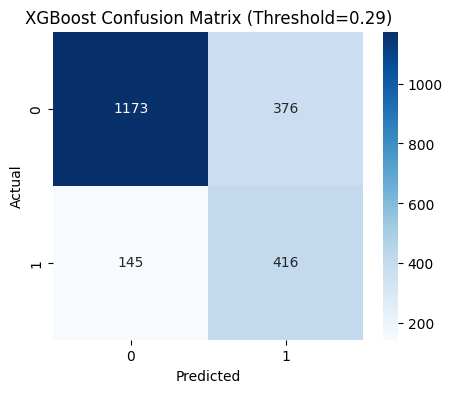

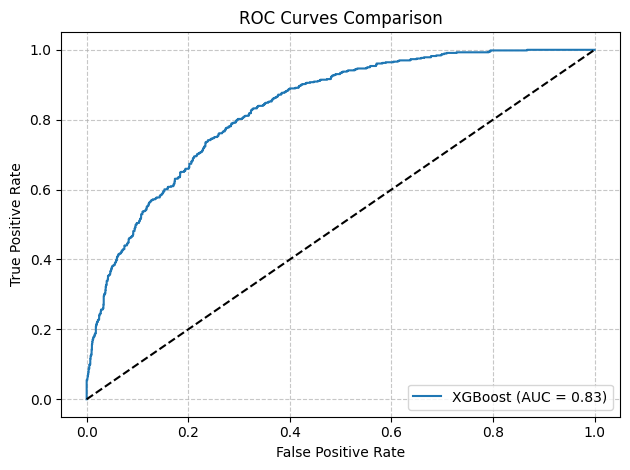


--- LightGBM (Best Threshold: 0.2900) ---
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1549
           1       0.53      0.73      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110



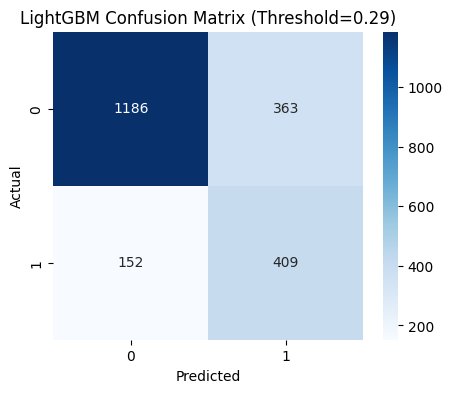

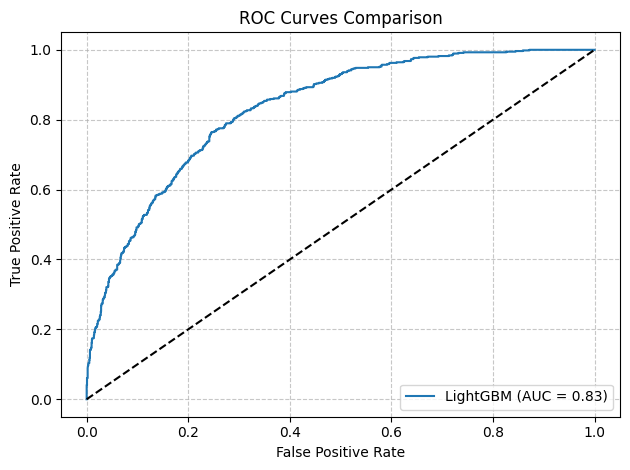


--- CatBoost (Best Threshold: 0.2900) ---
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1549
           1       0.52      0.74      0.61       561

    accuracy                           0.75      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.75      0.76      2110



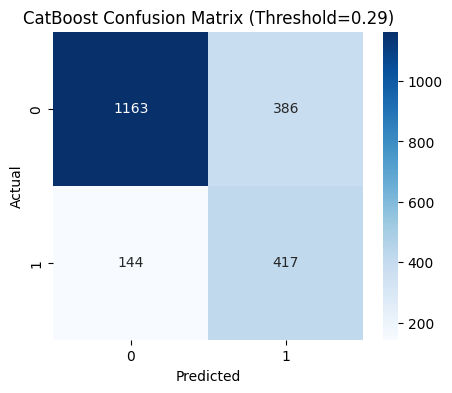

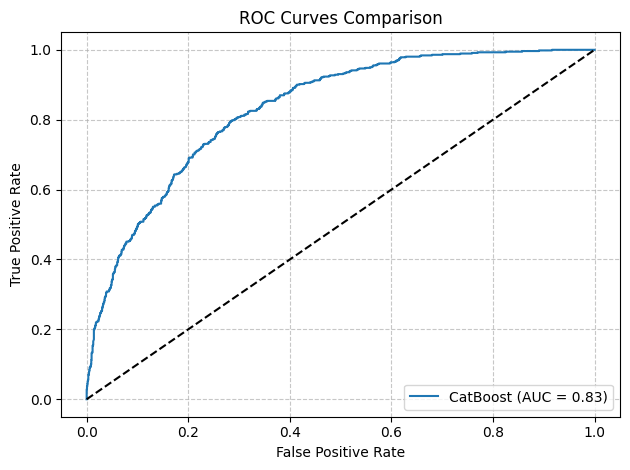


--- Summary of All Model Results ---
                 Model  Best Threshold  Accuracy  F1 Score       AUC  \
0        Random Forest            0.29  0.749763  0.615721  0.836034   
1  Logistic Regression            0.29  0.744550  0.615275  0.841667   
2        Decision Tree            0.29  0.710900  0.560519  0.763425   
3              XGBoost            0.29  0.753081  0.614930  0.833873   
4             LightGBM            0.29  0.755924  0.613653  0.833325   
5             CatBoost            0.29  0.748815  0.611437  0.832535   

   Precision(churn=0)  Precision(churn=1)  F1-score(churn=1)  Recall(churn=1)  \
0            0.893601            0.520295           0.615721         0.754011   
1            0.897638            0.513095           0.615275         0.768271   
2            0.865939            0.470375           0.560519         0.693405   
3            0.889985            0.525253           0.614930         0.741533   
4            0.886398            0.529793           

In [10]:
import warnings
warnings.filterwarnings('ignore')
# Preprocessing & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
# GAN
from ctgan import CTGAN
# 1. DATA PREPARATION (Functional Approach)
# Assuming 'df' is your telecom dataframe and 'Churn' is the target (0 or 1)
X = df.drop('Churn', axis=1)
y = df['Churn']


def tune_threshold(model, X_val, y_val, thresholds=np.arange(0.2, 0.3, 0.01)):
    y_val_probs = model.predict_proba(X_val)[:,1]
    best_threshold, best_score = 0.5, 0
    for t in thresholds:
        y_val_pred = (y_val_probs >= t).astype(int)
        score = fbeta_score(y_val, y_val_pred, beta=0.2)  # F1 Score
        if score > best_score:
            best_score, best_threshold = score, t
    return best_threshold

# 2. TRAIN-TEST SPLIT (Split before any scaling or generation!)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp)

print("--- Training Set Size Evolution ---")

# Step 0: Original Size
print(f"1. Original Training Size: {len(X_train)} samples")
print(f"   - Real Churners: {sum(y_train == 1)}")
print(f"   - Real Non-Churners: {sum(y_train == 0)}")

# Identify categorical columns (This will now work because we didn't use get_dummies yet!)
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. SMOTified GAN (Hybrid Generation)
print("Starting SMOTified GAN Process...")

# To keep this clean, we encode temporarily only for SMOTE, but use RAW for GAN
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_smote_enc, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

print(f"\n2. Size after SMOTE (Augmentation): {len(X_train_smote_enc)} samples")
print(f"   - SMOTE-Augmented Churners: {sum(y_train_smote == 1)}")
print(f"   - SMOTE-Augmented Non-Churners: {sum(y_train_smote == 0)}")
# B. CTGAN (The Realism Step)

# B. Step 2: CTGAN Refinement (The "SMOTified" Step)
# We train the GAN on the SMOTE-generated churners so it learns to "smooth" them
smote_churners = X_train_smote_enc[y_train_smote == 1].copy()
d_loss_history = []
g_loss_history = []

gan_model = CTGAN(
    epochs=500, 
    batch_size=64, 
    pac=8, 
    verbose=True
) 
gan_model.fit(smote_churners)
if hasattr(gan_model, 'loss_values'):
    d_loss_history = gan_model.loss_values.iloc[:, 1].tolist() # Discriminator is usually col 1
    g_loss_history = gan_model.loss_values.iloc[:, 2].tolist() # Generator is usually col 2
else:
    # Fallback if the attribute is named differently in your specific version
    d_loss_history = [0] * 300 
    g_loss_history = [0] * 300

# --- ADD YOUR PLOT CODE HERE ---
plt.figure(figsize=(10, 6))
plt.plot(d_loss_history, label='Discriminator Loss', linewidth=2, color='blue')
plt.plot(g_loss_history, label='Generator Loss', linewidth=2, color='orange')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effectiveness of Synthetic Data GAN Training', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# C. Step 3: Generate Refined Samples
target_count = len(y_train[y_train == 0])
needed_samples = target_count - len(y_train[y_train == 1])
synthetic_refined = gan_model.sample(needed_samples)

# Combine original ENCODED training data with GAN-Refined SMOTE churners
X_train_ready = pd.concat([X_train_encoded, synthetic_refined])
y_train_final = pd.concat([y_train, pd.Series([1]*len(synthetic_refined))])
print(f"\n3. Final SMOTified GAN Training Size: {len(X_train_ready)} samples")
print(f"   - Total Balanced Churners: {sum(y_train_final == 1)}")
print(f"   - Total Non-Churners: {sum(y_train_final == 0)}")
print("----------------------------------")

# Ensure Validation and Test sets match the encoded training columns
X_val_ready = pd.get_dummies(X_val, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
X_test_ready = pd.get_dummies(X_test, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
# 4. FEATURE SCALING
scaler = StandardScaler()

# Use the "_ready" variables which contain the 0/1 numeric columns
X_train_scaled = scaler.fit_transform(X_train_ready) 
X_val_scaled = scaler.transform(X_val_ready) 
X_test_scaled = scaler.transform(X_test_ready)


# 5. EXECUTE ALL 6 MODELS
models = {
    # 1. Random Forest: Reduced depth to prevents overfitting to synthetic noise
    # removed class_weight because data is already 50/50 balanced
    "Random Forest": RandomForestClassifier(
        n_estimators=500,           # 1000 is often overkill
        max_depth=15,               # 40 is way too deep; 15 keeps it generalizing
        min_samples_split=10,       # Higher number prevents isolating single synthetic rows
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        n_jobs=-1,
        criterion='gini'
    ),

    # 2. Logistic Regression: 
    # removed class_weight='balanced'
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight=None,          # VITAL: Data is already balanced!
        random_state=42
    ),

    # 3. Decision Tree:
    # Reduced depth significantly
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,               # 40 causes massive overfitting
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        criterion='gini'
    ),

    # 4. XGBoost:
    # scale_pos_weight=1 means "treat classes equally"
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,                # 12 is too deep for tabular data (usually 4-8 is best)
        learning_rate=0.02,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,                    # Higher gamma = more conservative (higher precision)
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_weight=3,
        scale_pos_weight=1,         # VITAL: Removed the 1.05 bias
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1,
        tree_method='hist'
    ),

    # 5. LightGBM:
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        max_depth=8,                # Restrained depth
        learning_rate=0.02,
        num_leaves=32,              # 70 was likely overfitting
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_samples=10,
        random_state=42,
        class_weight=None,          # VITAL: Removed bias
        verbose=-1,
        n_jobs=-1,
        boosting_type='gbdt'
    ),

    # 6. CatBoost:
    # auto_class_weights='None' because we fixed the data ourselves
    "CatBoost": CatBoostClassifier(
        iterations=800,
        depth=6,                    # 12 is extremely deep for CatBoost (slow & overfits)
        learning_rate=0.02,
        l2_leaf_reg=5,              # Higher regularization = higher precision
        random_strength=1,
        bagging_temperature=0.5,
        border_count=128,
        random_state=42,
        verbose=0,
        thread_count=-1,
        auto_class_weights='None'   # VITAL: Do not let model re-balance
    )
}

print("\n--- Model Performance Results ---")
model_results = {}
results=[]
best_thresholds = {}

for name, model in models.items():
    # A. Train on balanced data
    model.fit(X_train_scaled, y_train_final)
    
    # B. Tune Threshold on the imbalanced Validation set
    t = tune_threshold(model, X_val_scaled, y_val)
    best_thresholds[name] = t
    
    # C. Evaluate on Test Set using the NEW threshold
    test_probs = model.predict_proba(X_test_scaled)[:,1]
    test_preds = (test_probs >= t).astype(int)
    model_results[name] = accuracy_score(y_test, test_preds)
    
    print(f"\n--- {name} (Best Threshold: {t:.4f}) ---")
    print(classification_report(y_test, test_preds))

    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix (Threshold={t:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    acc = accuracy_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    a = roc_auc_score(y_test, test_probs)
    results.append({
        "Model": name, "Best Threshold": round(best_thresholds[name], 2),
        "Accuracy": acc, "F1 Score": f1, "AUC": a,
        "Precision(churn=0)": precision_score(y_test, test_preds, pos_label=0),
        "Precision(churn=1)": precision_score(y_test, test_preds, pos_label=1),
        "F1-score(churn=1)": f1_score(y_test, test_preds, pos_label=1),
        "Recall(churn=1)": recall_score(y_test, test_preds, pos_label=1),
        "MaThthews Corr": matthews_corrcoef(y_test, test_preds),
        "G-Mean": geometric_mean_score(y_test, test_preds),
    })
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {a:.2f})")
    # Finalize ROC Plot outside the loop to show all models together
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves Comparison")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
print("\n--- Summary of All Model Results ---")
print(results_df)


--- Training Set Size Evolution ---
1. Original Training Size: 3445 samples
   - Real Churners: 915
   - Real Non-Churners: 2530
Starting SMOTified GAN Process...

2. Size after SMOTE (Augmentation): 4301 samples
   - SMOTE-Augmented Churners: 1771
   - SMOTE-Augmented Non-Churners: 2530


Gen. (-2.28) | Discrim. (-0.40): 100%|██████████| 500/500 [11:26<00:00,  1.37s/it]


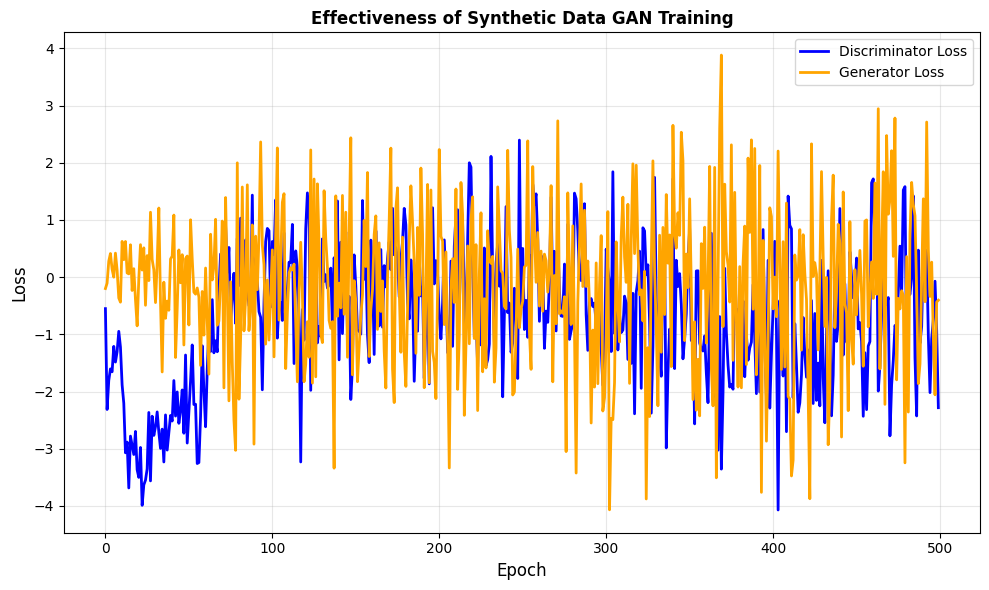


3. Final SMOTified GAN Training Size: 5060 samples
   - Total Balanced Churners: 2530
   - Total Non-Churners: 2530
----------------------------------

--- Model Performance Results ---

--- Random Forest (Best Threshold: 0.4900) ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



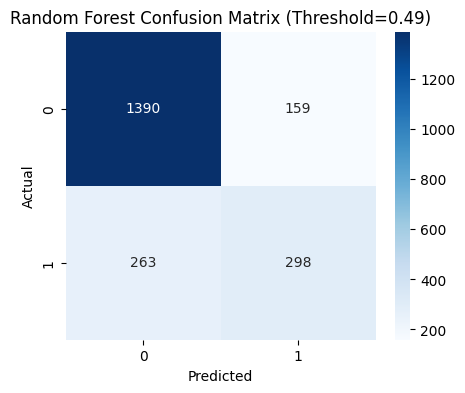

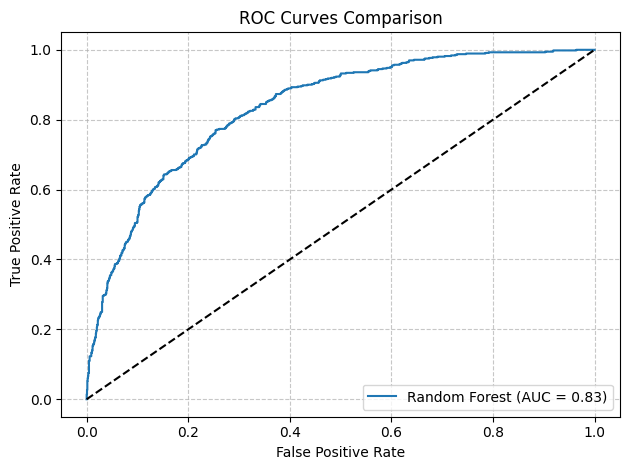


--- Logistic Regression (Best Threshold: 0.4800) ---
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1549
           1       0.64      0.57      0.60       561

    accuracy                           0.80      2110
   macro avg       0.74      0.73      0.73      2110
weighted avg       0.79      0.80      0.80      2110



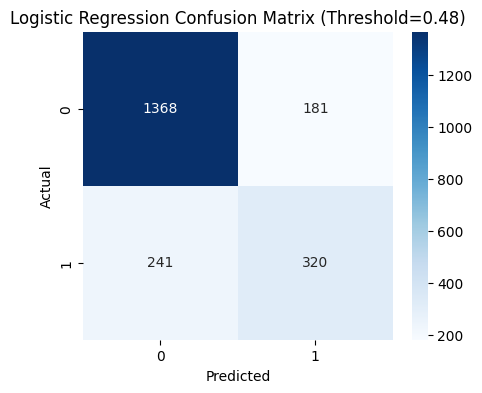

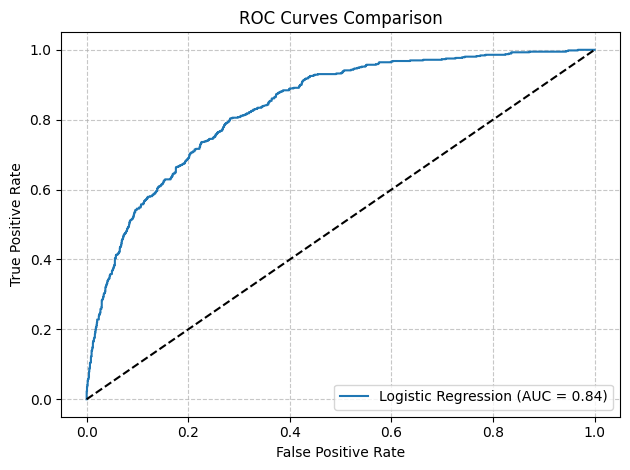


--- Decision Tree (Best Threshold: 0.4800) ---
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.54      0.54      0.54       561

    accuracy                           0.76      2110
   macro avg       0.69      0.69      0.69      2110
weighted avg       0.76      0.76      0.76      2110



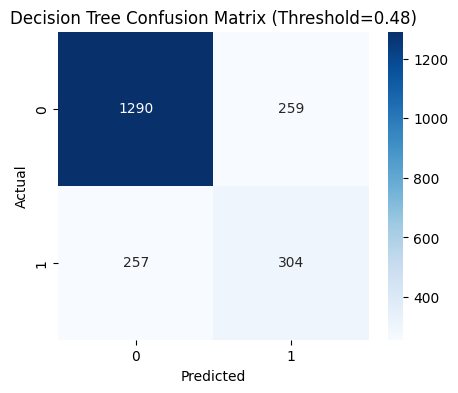

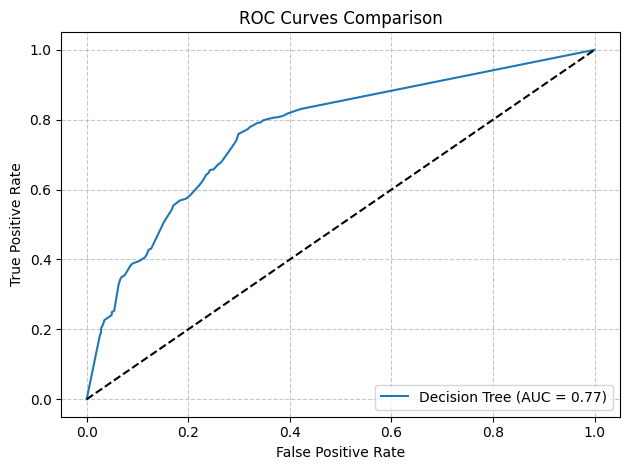


--- XGBoost (Best Threshold: 0.4800) ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.73      2110
weighted avg       0.79      0.80      0.80      2110



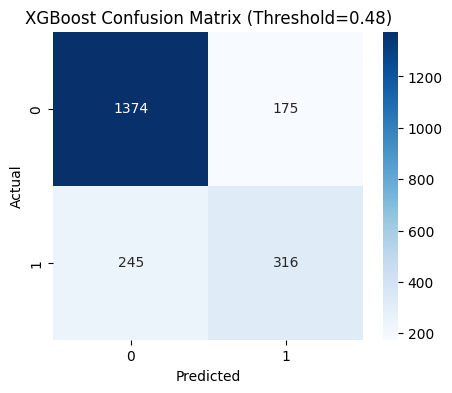

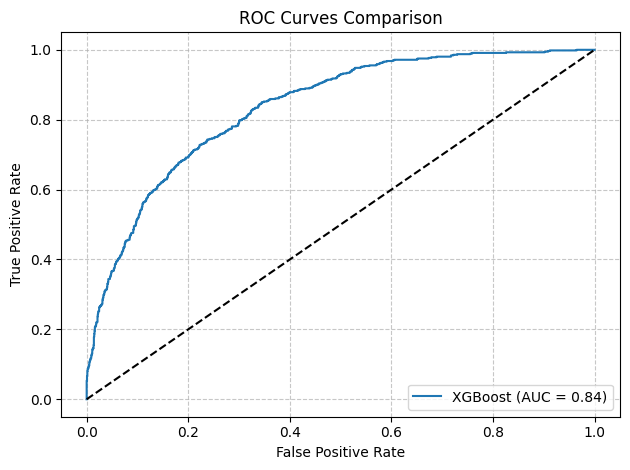


--- LightGBM (Best Threshold: 0.4800) ---
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1549
           1       0.62      0.56      0.59       561

    accuracy                           0.79      2110
   macro avg       0.73      0.72      0.73      2110
weighted avg       0.79      0.79      0.79      2110



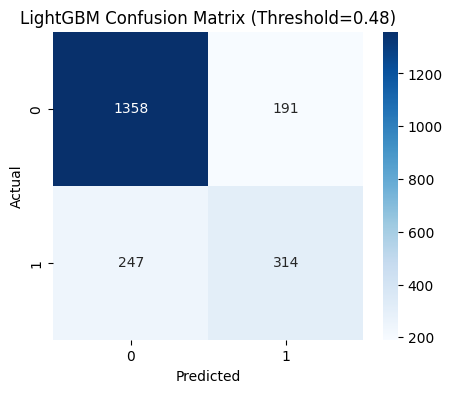

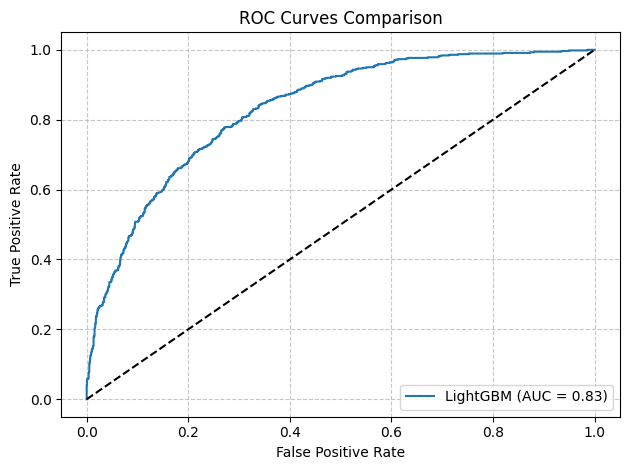


--- CatBoost (Best Threshold: 0.4900) ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.64      0.56      0.60       561

    accuracy                           0.80      2110
   macro avg       0.74      0.72      0.73      2110
weighted avg       0.79      0.80      0.79      2110



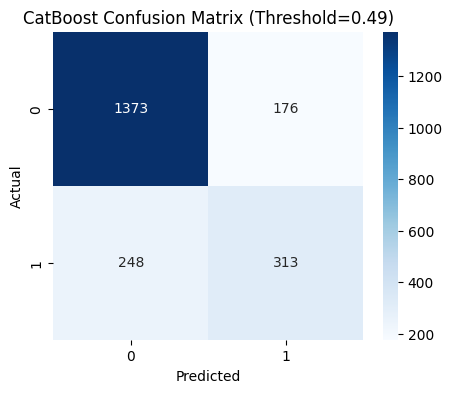

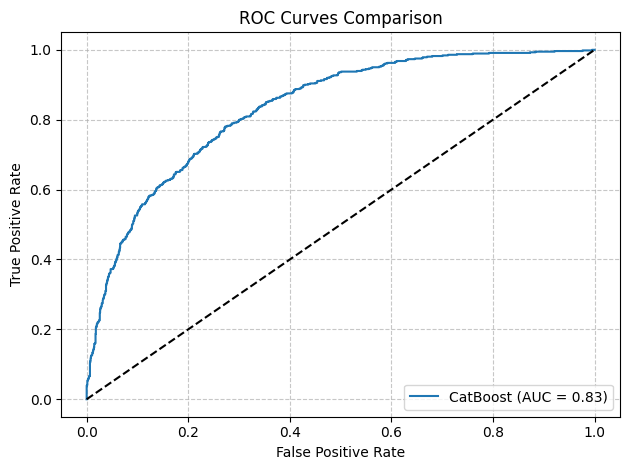


--- Summary of All Model Results ---
                 Model  Best Threshold  Accuracy  F1 Score       AUC  \
0        Random Forest            0.49  0.800000  0.585462  0.834829   
1  Logistic Regression            0.48  0.800000  0.602637  0.837553   
2        Decision Tree            0.48  0.755450  0.540925  0.767133   
3              XGBoost            0.48  0.800948  0.600760  0.835129   
4             LightGBM            0.48  0.792417  0.589118  0.832360   
5             CatBoost            0.49  0.799052  0.596190  0.833940   

   Precision(churn=0)  Precision(churn=1)  F1-score(churn=1)  Recall(churn=1)  \
0            0.840895            0.652079           0.585462         0.531194   
1            0.850218            0.638723           0.602637         0.570410   
2            0.833872            0.539964           0.540925         0.541889   
3            0.848672            0.643585           0.600760         0.563280   
4            0.846106            0.621782           

In [11]:
import warnings
warnings.filterwarnings('ignore')
# Preprocessing & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
# GAN
from ctgan import CTGAN
# 1. DATA PREPARATION (Functional Approach)
# Assuming 'df' is your telecom dataframe and 'Churn' is the target (0 or 1)
X = df.drop('Churn', axis=1)
y = df['Churn']


def tune_threshold(model, X_val, y_val, thresholds=np.arange(0.3, 0.5, 0.01)):
    y_val_probs = model.predict_proba(X_val)[:,1]
    best_threshold, best_score = 0.5, 0
    for t in thresholds:
        y_val_pred = (y_val_probs >= t).astype(int)
        score = fbeta_score(y_val, y_val_pred, beta=0.2)  # F1 Score
        if score > best_score:
            best_score, best_threshold = score, t
    return best_threshold

# 2. TRAIN-TEST SPLIT (Split before any scaling or generation!)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp)

print("--- Training Set Size Evolution ---")

# Step 0: Original Size
print(f"1. Original Training Size: {len(X_train)} samples")
print(f"   - Real Churners: {sum(y_train == 1)}")
print(f"   - Real Non-Churners: {sum(y_train == 0)}")

# Identify categorical columns (This will now work because we didn't use get_dummies yet!)
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. SMOTified GAN (Hybrid Generation)
print("Starting SMOTified GAN Process...")

# To keep this clean, we encode temporarily only for SMOTE, but use RAW for GAN
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_smote_enc, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

print(f"\n2. Size after SMOTE (Augmentation): {len(X_train_smote_enc)} samples")
print(f"   - SMOTE-Augmented Churners: {sum(y_train_smote == 1)}")
print(f"   - SMOTE-Augmented Non-Churners: {sum(y_train_smote == 0)}")
# B. CTGAN (The Realism Step)

# B. Step 2: CTGAN Refinement (The "SMOTified" Step)
# We train the GAN on the SMOTE-generated churners so it learns to "smooth" them
smote_churners = X_train_smote_enc[y_train_smote == 1].copy()
d_loss_history = []
g_loss_history = []

gan_model = CTGAN(
    epochs=500, 
    batch_size=64, 
    pac=8, 
    verbose=True
) 
gan_model.fit(smote_churners)
if hasattr(gan_model, 'loss_values'):
    d_loss_history = gan_model.loss_values.iloc[:, 1].tolist() # Discriminator is usually col 1
    g_loss_history = gan_model.loss_values.iloc[:, 2].tolist() # Generator is usually col 2
else:
    # Fallback if the attribute is named differently in your specific version
    d_loss_history = [0] * 300 
    g_loss_history = [0] * 300

# --- ADD YOUR PLOT CODE HERE ---
plt.figure(figsize=(10, 6))
plt.plot(d_loss_history, label='Discriminator Loss', linewidth=2, color='blue')
plt.plot(g_loss_history, label='Generator Loss', linewidth=2, color='orange')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effectiveness of Synthetic Data GAN Training', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# C. Step 3: Generate Refined Samples
target_count = len(y_train[y_train == 0])
needed_samples = target_count - len(y_train[y_train == 1])
synthetic_refined = gan_model.sample(needed_samples)

# Combine original ENCODED training data with GAN-Refined SMOTE churners
X_train_ready = pd.concat([X_train_encoded, synthetic_refined])
y_train_final = pd.concat([y_train, pd.Series([1]*len(synthetic_refined))])
print(f"\n3. Final SMOTified GAN Training Size: {len(X_train_ready)} samples")
print(f"   - Total Balanced Churners: {sum(y_train_final == 1)}")
print(f"   - Total Non-Churners: {sum(y_train_final == 0)}")
print("----------------------------------")

# Ensure Validation and Test sets match the encoded training columns
X_val_ready = pd.get_dummies(X_val, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
X_test_ready = pd.get_dummies(X_test, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
# 4. FEATURE SCALING
scaler = StandardScaler()

# Use the "_ready" variables which contain the 0/1 numeric columns
X_train_scaled = scaler.fit_transform(X_train_ready) 
X_val_scaled = scaler.transform(X_val_ready) 
X_test_scaled = scaler.transform(X_test_ready)


# 5. EXECUTE ALL 6 MODELS
models = {
    # 1. Random Forest: Reduced depth to prevents overfitting to synthetic noise
    # removed class_weight because data is already 50/50 balanced
    "Random Forest": RandomForestClassifier(
        n_estimators=500,           # 1000 is often overkill
        max_depth=15,               # 40 is way too deep; 15 keeps it generalizing
        min_samples_split=10,       # Higher number prevents isolating single synthetic rows
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        n_jobs=-1,
        criterion='gini'
    ),

    # 2. Logistic Regression: 
    # removed class_weight='balanced'
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight=None,          # VITAL: Data is already balanced!
        random_state=42
    ),

    # 3. Decision Tree:
    # Reduced depth significantly
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,               # 40 causes massive overfitting
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        criterion='gini'
    ),

    # 4. XGBoost:
    # scale_pos_weight=1 means "treat classes equally"
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,                # 12 is too deep for tabular data (usually 4-8 is best)
        learning_rate=0.02,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,                    # Higher gamma = more conservative (higher precision)
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_weight=3,
        scale_pos_weight=1,         # VITAL: Removed the 1.05 bias
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1,
        tree_method='hist'
    ),

    # 5. LightGBM:
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        max_depth=8,                # Restrained depth
        learning_rate=0.02,
        num_leaves=32,              # 70 was likely overfitting
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_samples=10,
        random_state=42,
        class_weight=None,          # VITAL: Removed bias
        verbose=-1,
        n_jobs=-1,
        boosting_type='gbdt'
    ),

    # 6. CatBoost:
    # auto_class_weights='None' because we fixed the data ourselves
    "CatBoost": CatBoostClassifier(
        iterations=800,
        depth=6,                    # 12 is extremely deep for CatBoost (slow & overfits)
        learning_rate=0.02,
        l2_leaf_reg=5,              # Higher regularization = higher precision
        random_strength=1,
        bagging_temperature=0.5,
        border_count=128,
        random_state=42,
        verbose=0,
        thread_count=-1,
        auto_class_weights='None'   # VITAL: Do not let model re-balance
    )
}

print("\n--- Model Performance Results ---")
model_results = {}
results=[]
best_thresholds = {}

for name, model in models.items():
    # A. Train on balanced data
    model.fit(X_train_scaled, y_train_final)
    
    # B. Tune Threshold on the imbalanced Validation set
    t = tune_threshold(model, X_val_scaled, y_val)
    best_thresholds[name] = t
    
    # C. Evaluate on Test Set using the NEW threshold
    test_probs = model.predict_proba(X_test_scaled)[:,1]
    test_preds = (test_probs >= t).astype(int)
    model_results[name] = accuracy_score(y_test, test_preds)
    
    print(f"\n--- {name} (Best Threshold: {t:.4f}) ---")
    print(classification_report(y_test, test_preds))

    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix (Threshold={t:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    acc = accuracy_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    a = roc_auc_score(y_test, test_probs)
    results.append({
        "Model": name, "Best Threshold": round(best_thresholds[name], 2),
        "Accuracy": acc, "F1 Score": f1, "AUC": a,
        "Precision(churn=0)": precision_score(y_test, test_preds, pos_label=0),
        "Precision(churn=1)": precision_score(y_test, test_preds, pos_label=1),
        "F1-score(churn=1)": f1_score(y_test, test_preds, pos_label=1),
        "Recall(churn=1)": recall_score(y_test, test_preds, pos_label=1),
        "MaThthews Corr": matthews_corrcoef(y_test, test_preds),
        "G-Mean": geometric_mean_score(y_test, test_preds),
    })
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {a:.2f})")
    # Finalize ROC Plot outside the loop to show all models together
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves Comparison")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
print("\n--- Summary of All Model Results ---")
print(results_df)


--- Training Set Size Evolution ---
1. Original Training Size: 3445 samples
   - Real Churners: 915
   - Real Non-Churners: 2530
Starting SMOTified GAN Process...

2. Size after SMOTE (Augmentation): 4301 samples
   - SMOTE-Augmented Churners: 1771
   - SMOTE-Augmented Non-Churners: 2530


Gen. (-1.01) | Discrim. (0.65): 100%|██████████| 500/500 [10:58<00:00,  1.32s/it] 


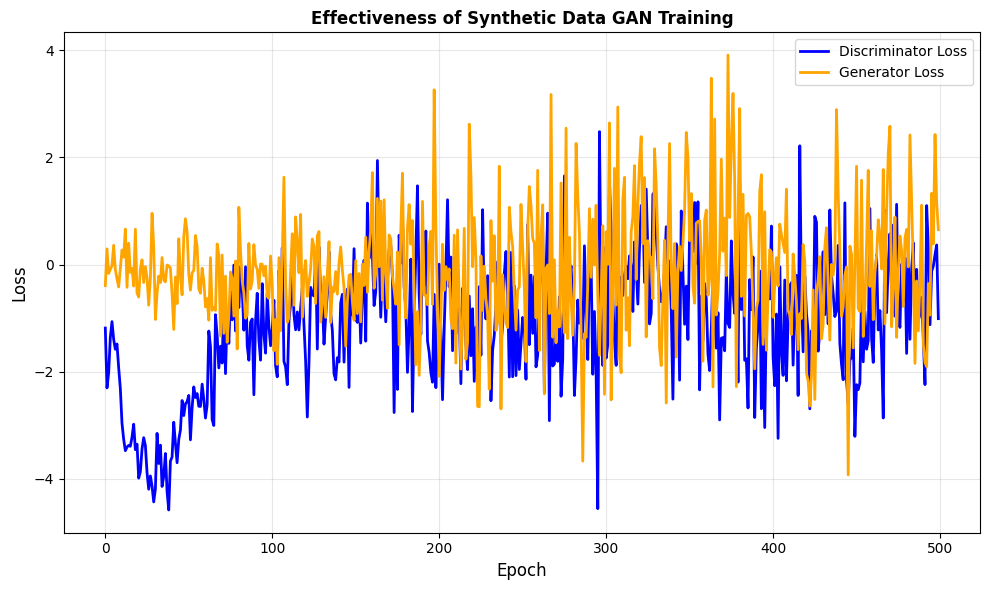


3. Final SMOTified GAN Training Size: 5060 samples
   - Total Balanced Churners: 2530
   - Total Non-Churners: 2530
----------------------------------

--- Model Performance Results ---

--- Random Forest (Best Threshold: 0.9000) ---
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       1.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.87      0.50      0.43      2110
weighted avg       0.81      0.73      0.62      2110



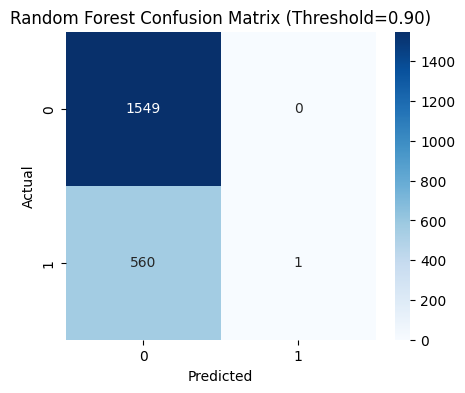

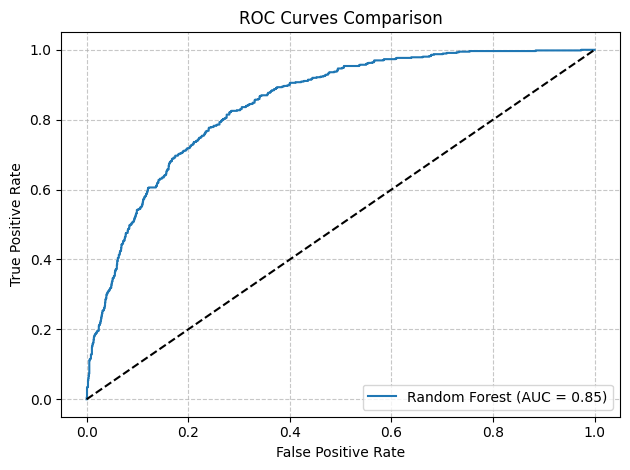


--- Logistic Regression (Best Threshold: 0.5000) ---
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



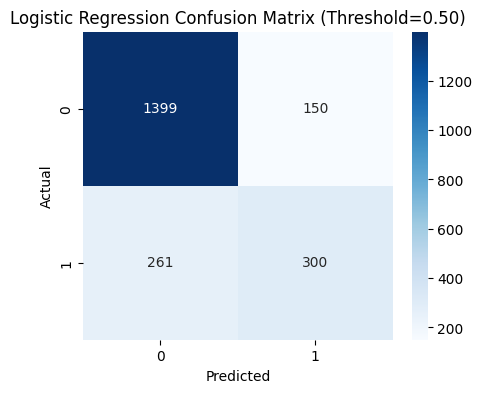

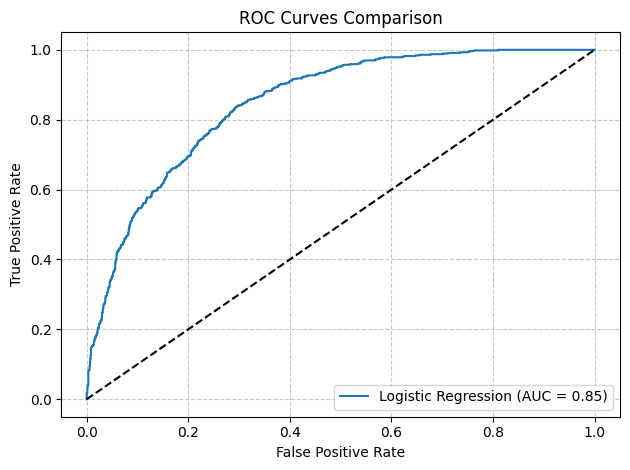


--- Decision Tree (Best Threshold: 0.9100) ---
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1549
           1       0.65      0.15      0.24       561

    accuracy                           0.75      2110
   macro avg       0.70      0.56      0.55      2110
weighted avg       0.73      0.75      0.69      2110



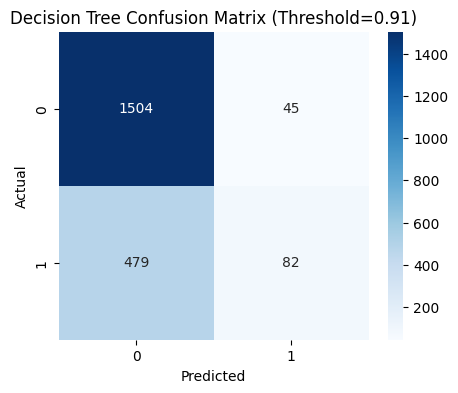

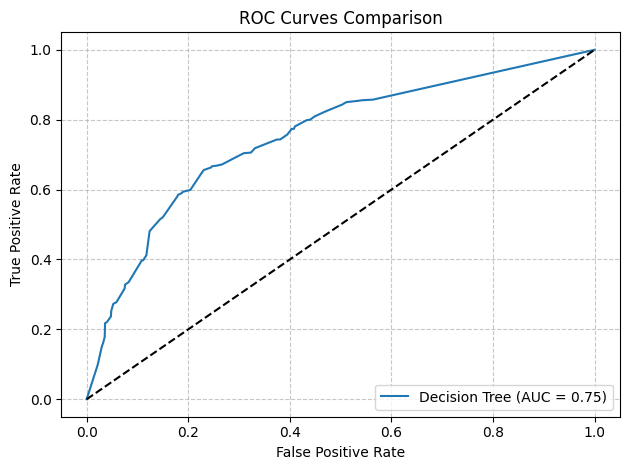


--- XGBoost (Best Threshold: 0.9000) ---
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.50      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.62      0.50      0.43      2110
weighted avg       0.67      0.73      0.62      2110



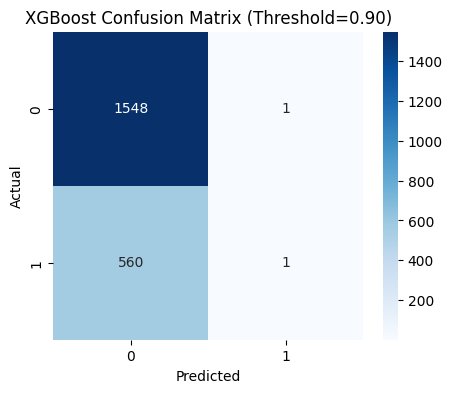

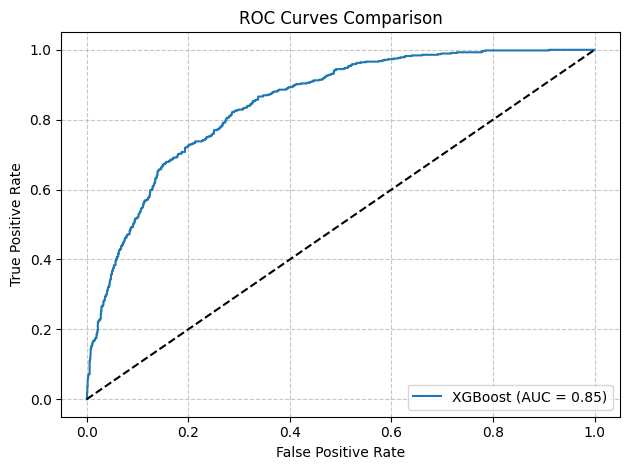


--- LightGBM (Best Threshold: 0.9000) ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1549
           1       0.91      0.02      0.03       561

    accuracy                           0.74      2110
   macro avg       0.82      0.51      0.44      2110
weighted avg       0.78      0.74      0.63      2110



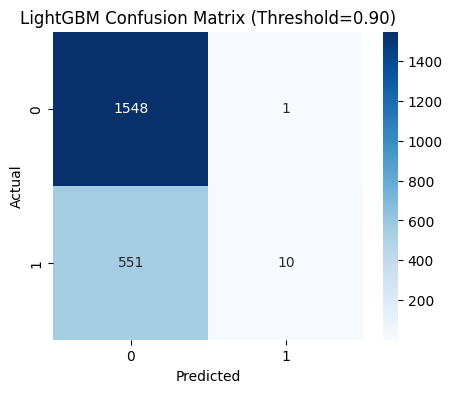

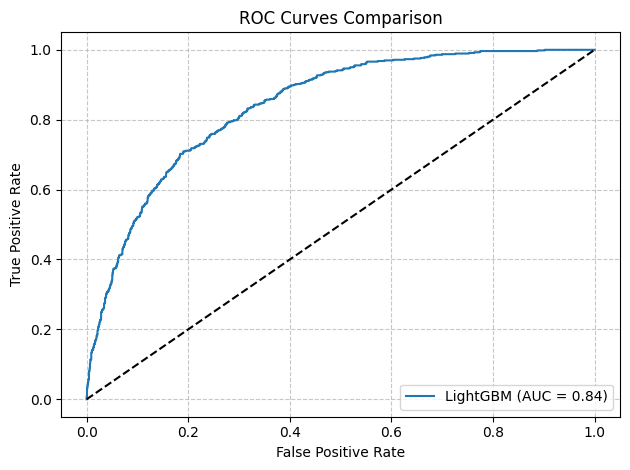


--- CatBoost (Best Threshold: 0.9000) ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1549
           1       0.88      0.01      0.02       561

    accuracy                           0.74      2110
   macro avg       0.81      0.51      0.44      2110
weighted avg       0.77      0.74      0.63      2110



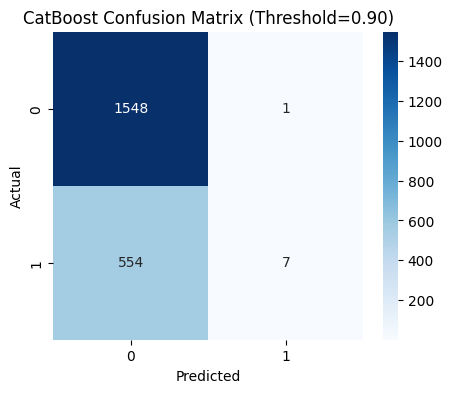

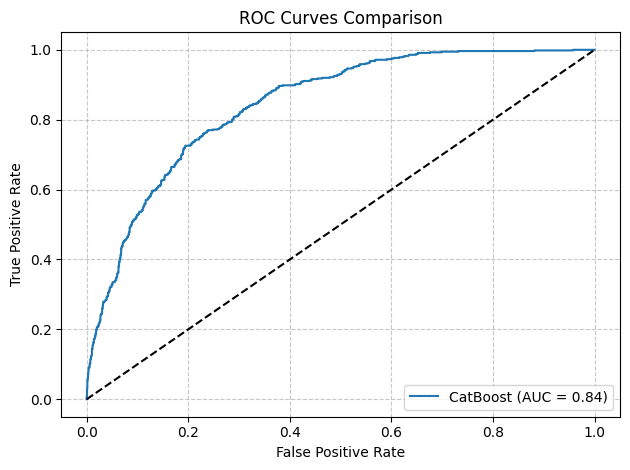


--- Summary of All Model Results ---
                 Model  Best Threshold  Accuracy  F1 Score       AUC  \
0        Random Forest            0.90  0.734597  0.003559  0.846895   
1  Logistic Regression            0.50  0.805213  0.593472  0.848055   
2        Decision Tree            0.91  0.751659  0.238372  0.752646   
3              XGBoost            0.90  0.734123  0.003552  0.846527   
4             LightGBM            0.90  0.738389  0.034965  0.840907   
5             CatBoost            0.90  0.736967  0.024605  0.843901   

   Precision(churn=0)  Precision(churn=1)  F1-score(churn=1)  Recall(churn=1)  \
0            0.734471            1.000000           0.003559         0.001783   
1            0.842771            0.666667           0.593472         0.534759   
2            0.758447            0.645669           0.238372         0.146168   
3            0.734345            0.500000           0.003552         0.001783   
4            0.737494            0.909091           

In [12]:
import warnings
warnings.filterwarnings('ignore')
# Preprocessing & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import geometric_mean_score
# GAN
from ctgan import CTGAN
# 1. DATA PREPARATION (Functional Approach)
# Assuming 'df' is your telecom dataframe and 'Churn' is the target (0 or 1)
X = df.drop('Churn', axis=1)
y = df['Churn']


def tune_threshold(model, X_val, y_val, thresholds=np.arange(0.9, 1, 0.01)):
    y_val_probs = model.predict_proba(X_val)[:,1]
    best_threshold, best_score = 0.5, 0
    for t in thresholds:
        y_val_pred = (y_val_probs >= t).astype(int)
        score = fbeta_score(y_val, y_val_pred, beta=0.2)  # F1 Score
        if score > best_score:
            best_score, best_threshold = score, t
    return best_threshold

# 2. TRAIN-TEST SPLIT (Split before any scaling or generation!)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp)

print("--- Training Set Size Evolution ---")

# Step 0: Original Size
print(f"1. Original Training Size: {len(X_train)} samples")
print(f"   - Real Churners: {sum(y_train == 1)}")
print(f"   - Real Non-Churners: {sum(y_train == 0)}")

# Identify categorical columns (This will now work because we didn't use get_dummies yet!)
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# 3. SMOTified GAN (Hybrid Generation)
print("Starting SMOTified GAN Process...")

# To keep this clean, we encode temporarily only for SMOTE, but use RAW for GAN
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_train_smote_enc, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

print(f"\n2. Size after SMOTE (Augmentation): {len(X_train_smote_enc)} samples")
print(f"   - SMOTE-Augmented Churners: {sum(y_train_smote == 1)}")
print(f"   - SMOTE-Augmented Non-Churners: {sum(y_train_smote == 0)}")
# B. CTGAN (The Realism Step)

# B. Step 2: CTGAN Refinement (The "SMOTified" Step)
# We train the GAN on the SMOTE-generated churners so it learns to "smooth" them
smote_churners = X_train_smote_enc[y_train_smote == 1].copy()
d_loss_history = []
g_loss_history = []

gan_model = CTGAN(
    epochs=500, 
    batch_size=64, 
    pac=8, 
    verbose=True
) 
gan_model.fit(smote_churners)
if hasattr(gan_model, 'loss_values'):
    d_loss_history = gan_model.loss_values.iloc[:, 1].tolist() # Discriminator is usually col 1
    g_loss_history = gan_model.loss_values.iloc[:, 2].tolist() # Generator is usually col 2
else:
    # Fallback if the attribute is named differently in your specific version
    d_loss_history = [0] * 300 
    g_loss_history = [0] * 300

# --- ADD YOUR PLOT CODE HERE ---
plt.figure(figsize=(10, 6))
plt.plot(d_loss_history, label='Discriminator Loss', linewidth=2, color='blue')
plt.plot(g_loss_history, label='Generator Loss', linewidth=2, color='orange')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effectiveness of Synthetic Data GAN Training', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# C. Step 3: Generate Refined Samples
target_count = len(y_train[y_train == 0])
needed_samples = target_count - len(y_train[y_train == 1])
synthetic_refined = gan_model.sample(needed_samples)

# Combine original ENCODED training data with GAN-Refined SMOTE churners
X_train_ready = pd.concat([X_train_encoded, synthetic_refined])
y_train_final = pd.concat([y_train, pd.Series([1]*len(synthetic_refined))])
print(f"\n3. Final SMOTified GAN Training Size: {len(X_train_ready)} samples")
print(f"   - Total Balanced Churners: {sum(y_train_final == 1)}")
print(f"   - Total Non-Churners: {sum(y_train_final == 0)}")
print("----------------------------------")

# Ensure Validation and Test sets match the encoded training columns
X_val_ready = pd.get_dummies(X_val, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
X_test_ready = pd.get_dummies(X_test, drop_first=True).reindex(columns=X_train_ready.columns, fill_value=0)
# 4. FEATURE SCALING
scaler = StandardScaler()

# Use the "_ready" variables which contain the 0/1 numeric columns
X_train_scaled = scaler.fit_transform(X_train_ready) 
X_val_scaled = scaler.transform(X_val_ready) 
X_test_scaled = scaler.transform(X_test_ready)


# 5. EXECUTE ALL 6 MODELS
models = {
    # 1. Random Forest: Reduced depth to prevents overfitting to synthetic noise
    # removed class_weight because data is already 50/50 balanced
    "Random Forest": RandomForestClassifier(
        n_estimators=500,           # 1000 is often overkill
        max_depth=15,               # 40 is way too deep; 15 keeps it generalizing
        min_samples_split=10,       # Higher number prevents isolating single synthetic rows
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        n_jobs=-1,
        criterion='gini'
    ),

    # 2. Logistic Regression: 
    # removed class_weight='balanced'
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight=None,          # VITAL: Data is already balanced!
        random_state=42
    ),

    # 3. Decision Tree:
    # Reduced depth significantly
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,               # 40 causes massive overfitting
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42,
        class_weight=None,          # VITAL: Data is already balanced!
        criterion='gini'
    ),

    # 4. XGBoost:
    # scale_pos_weight=1 means "treat classes equally"
    "XGBoost": XGBClassifier(
        n_estimators=500,
        max_depth=6,                # 12 is too deep for tabular data (usually 4-8 is best)
        learning_rate=0.02,
        subsample=0.8,
        colsample_bytree=0.8,
        gamma=1,                    # Higher gamma = more conservative (higher precision)
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_weight=3,
        scale_pos_weight=1,         # VITAL: Removed the 1.05 bias
        random_state=42,
        eval_metric='logloss',
        n_jobs=-1,
        tree_method='hist'
    ),

    # 5. LightGBM:
    "LightGBM": LGBMClassifier(
        n_estimators=500,
        max_depth=8,                # Restrained depth
        learning_rate=0.02,
        num_leaves=32,              # 70 was likely overfitting
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=1,
        min_child_samples=10,
        random_state=42,
        class_weight=None,          # VITAL: Removed bias
        verbose=-1,
        n_jobs=-1,
        boosting_type='gbdt'
    ),

    # 6. CatBoost:
    # auto_class_weights='None' because we fixed the data ourselves
    "CatBoost": CatBoostClassifier(
        iterations=800,
        depth=6,                    # 12 is extremely deep for CatBoost (slow & overfits)
        learning_rate=0.02,
        l2_leaf_reg=5,              # Higher regularization = higher precision
        random_strength=1,
        bagging_temperature=0.5,
        border_count=128,
        random_state=42,
        verbose=0,
        thread_count=-1,
        auto_class_weights='None'   # VITAL: Do not let model re-balance
    )
}

print("\n--- Model Performance Results ---")
model_results = {}
results=[]
best_thresholds = {}

for name, model in models.items():
    # A. Train on balanced data
    model.fit(X_train_scaled, y_train_final)
    
    # B. Tune Threshold on the imbalanced Validation set
    t = tune_threshold(model, X_val_scaled, y_val)
    best_thresholds[name] = t
    
    # C. Evaluate on Test Set using the NEW threshold
    test_probs = model.predict_proba(X_test_scaled)[:,1]
    test_preds = (test_probs >= t).astype(int)
    model_results[name] = accuracy_score(y_test, test_preds)
    
    print(f"\n--- {name} (Best Threshold: {t:.4f}) ---")
    print(classification_report(y_test, test_preds))

    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix (Threshold={t:.2f})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    acc = accuracy_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    a = roc_auc_score(y_test, test_probs)
    results.append({
        "Model": name, "Best Threshold": round(best_thresholds[name], 2),
        "Accuracy": acc, "F1 Score": f1, "AUC": a,
        "Precision(churn=0)": precision_score(y_test, test_preds, pos_label=0),
        "Precision(churn=1)": precision_score(y_test, test_preds, pos_label=1),
        "F1-score(churn=1)": f1_score(y_test, test_preds, pos_label=1),
        "Recall(churn=1)": recall_score(y_test, test_preds, pos_label=1),
        "MaThthews Corr": matthews_corrcoef(y_test, test_preds),
        "G-Mean": geometric_mean_score(y_test, test_preds),
    })
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {a:.2f})")
    # Finalize ROC Plot outside the loop to show all models together
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves Comparison")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Summarize results in a DataFrame
results_df = pd.DataFrame(results)
print("\n--- Summary of All Model Results ---")
print(results_df)


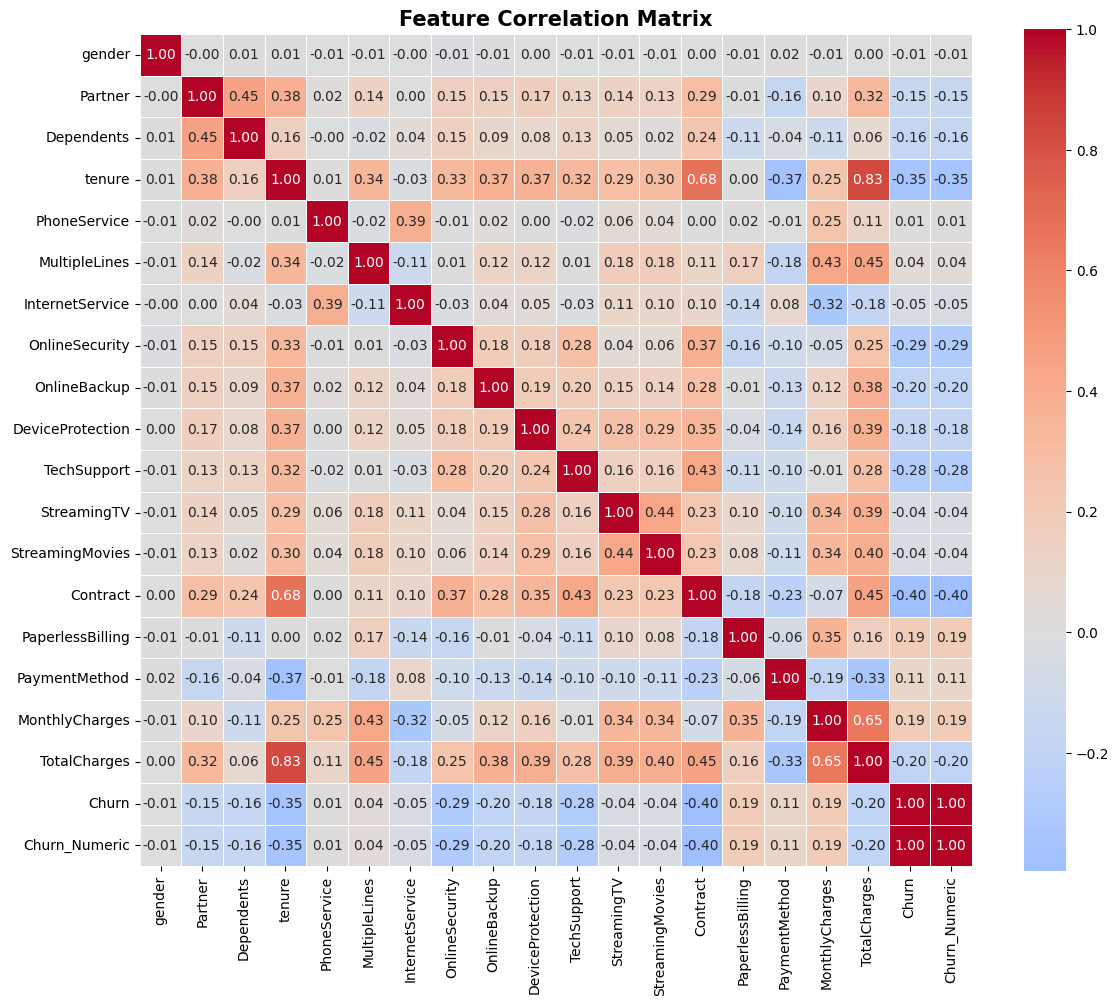


Top Features Correlated with Churn:
Churn               1.000000
Churn_Numeric       1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
Name: Churn_Numeric, dtype: float64
Visualizing relationships using the ORIGINAL raw dataset...


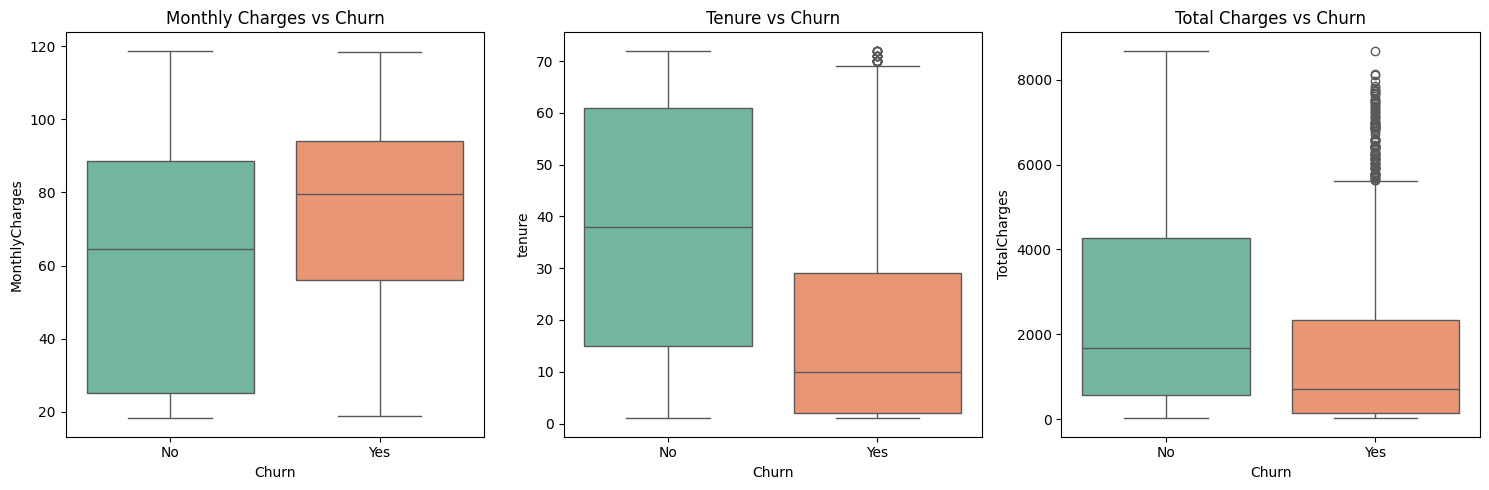

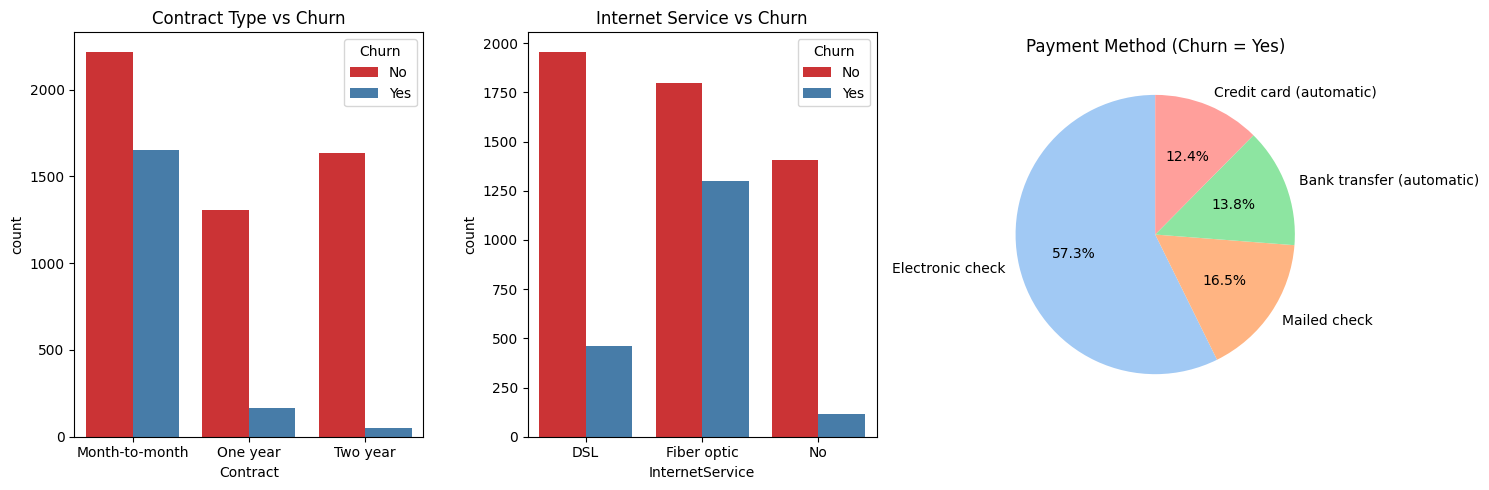

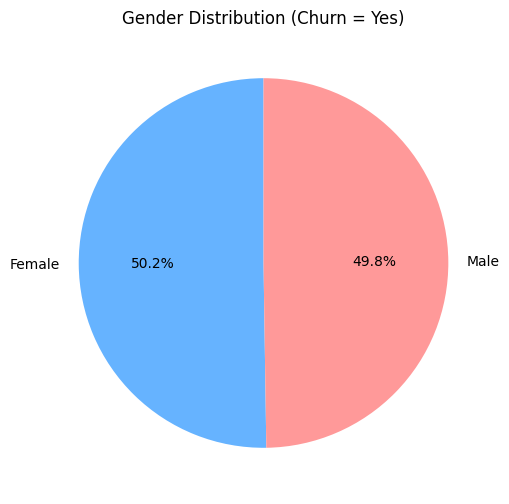

In [13]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
# Create correlation matrix
df_corr = df.copy()

# Fix: Ensure the numeric column exists BEFORE encoding and correlation
if 'Churn' in df_corr.columns:
    df_corr['Churn_Numeric'] = df_corr['Churn'].apply(lambda x: 1 if x == 'Yes' or x == 1 else 0)

# Drop customerID if it exists
if 'customerID' in df_corr.columns:
    df_corr.drop('customerID', axis=1, inplace=True)

# Encode Categorical Features
le = LabelEncoder()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Calculate Matrix (Fixed the NaN issue)
correlation_matrix = df_corr.corr()

# Plot Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            fmt='.2f', 
            square=True, 
            linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlations specifically for Churn
print("\nTop Features Correlated with Churn:")
# This will now print actual values instead of NaN
print(correlation_matrix['Churn_Numeric'].sort_values(ascending=False).head(10))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_relationships():
    # 1. Load the original raw dataset fresh
    # Use raw string (r"path") to avoid path errors
    original_df = pd.read_csv(r"D:\Bos\WA_Fn-UseC_-Telco-Customer-Churn.csv")

    # 2. Basic Cleaning for Visualization
    # Convert TotalCharges to numeric, force non-numeric to NaN
    original_df['TotalCharges'] = pd.to_numeric(original_df['TotalCharges'], errors='coerce')
    
    # Drop rows with missing values (usually very few in this dataset)
    original_df.dropna(inplace=True)

    # Strip extra spaces from column names just in case
    original_df.columns = original_df.columns.str.strip()

    # Filter churned customers for specific charts
    churned_df = original_df[original_df['Churn'] == 'Yes']

    # ==============================
    # A. Numerical Features vs Churn
    # ==============================
    plt.figure(figsize=(15, 5))

    # Monthly Charges 
    plt.subplot(1, 3, 1)
    sns.boxplot(x='Churn', y='MonthlyCharges', data=original_df, palette="Set2")
    plt.title('Monthly Charges vs Churn')

    # Tenure
    plt.subplot(1, 3, 2)
    sns.boxplot(x='Churn', y='tenure', data=original_df, palette="Set2")
    plt.title('Tenure vs Churn')

    # Total Charges
    plt.subplot(1, 3, 3)
    sns.boxplot(x='Churn', y='TotalCharges', data=original_df, palette="Set2")
    plt.title('Total Charges vs Churn')

    plt.tight_layout()
    plt.show()

    # ==============================
    # B. Categorical Features vs Churn
    # ==============================
    plt.figure(figsize=(15, 5))

    # Contract Type
    plt.subplot(1, 3, 1)
    sns.countplot(data=original_df, x='Contract', hue='Churn', palette="Set1")
    plt.title('Contract Type vs Churn')
    plt.xticks(rotation=0)

    # Internet Service
    plt.subplot(1, 3, 2)
    sns.countplot(data=original_df, x='InternetService', hue='Churn', palette="Set1")
    plt.title('Internet Service vs Churn')
    plt.xticks(rotation=0)

    # Payment Method (Among Churned Users Only)
    plt.subplot(1, 3, 3)
    payment_counts = churned_df['PaymentMethod'].value_counts()
    plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title('Payment Method (Churn = Yes)')

    plt.tight_layout()
    plt.show()

    # ==============================
    # C. Gender Distribution
    # ==============================
    plt.figure(figsize=(6, 6))
    gender_counts = churned_df['gender'].value_counts()
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
    plt.title('Gender Distribution (Churn = Yes)')
    plt.show()

print("Visualizing relationships using the ORIGINAL raw dataset...")
plot_feature_relationships()